<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [80]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

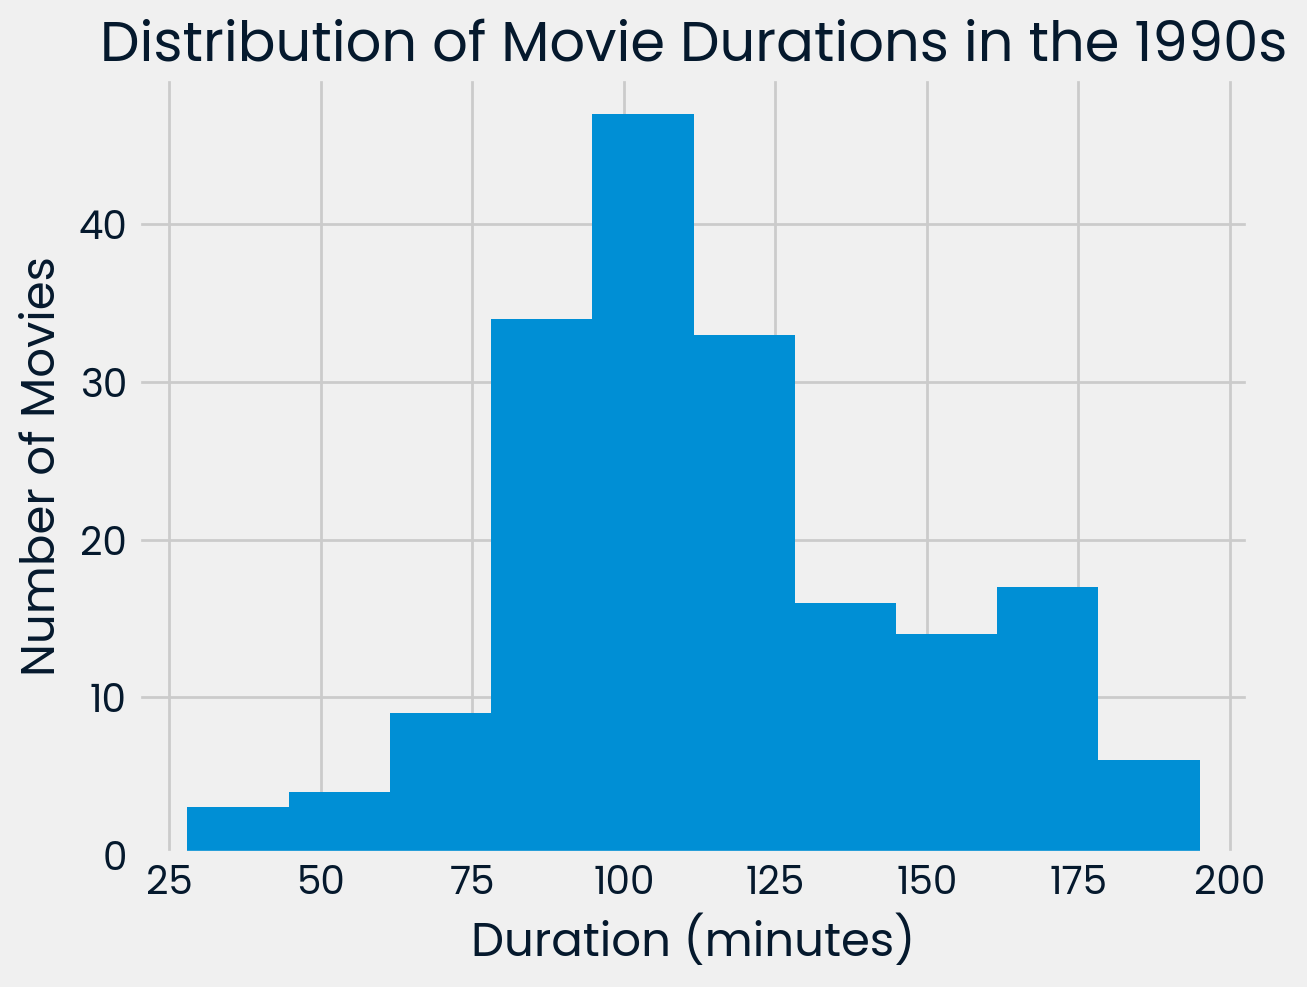

7


In [81]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

# Filter the to keep only movies released in the 1990s
# Start by filtering out movies that were released before 1990
subset = netflix_subset[(netflix_subset["release_year"] >= 1990)]

# And then do the same to filter out movies released on or after 2000
movies_1990s = subset[(subset["release_year"] < 2000)]

# Another way to do this step is to use the & operator which allows you to do this type of filtering in one step
# movies_1990s = netflix_subset[(netflix_subset["release_year"] >= 1990) & (netflix_subset["release_year"] < 2000)]

# Visualize the duration column of your filtered data to see the distribution of movie durations
# See which bar is the highest and save the duration value, this doesn't need to be exact!
plt.hist(movies_1990s["duration"])
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

duration = 100

# Filter the data again to keep only the Action movies
action_movies_1990s = movies_1990s[movies_1990s["genre"] == "Action"]

# Use a for loop and a counter to count how many short action movies there were in the 1990s

# Start the counter
short_movie_count = 0

# Iterate over the labels and rows of the DataFrame and check if the duration is less than 90, if it is, add 1 to the counter, if it isn't, the counter should remain the same
for label, row in action_movies_1990s.iterrows() :
    if row["duration"] < 90 :
        short_movie_count = short_movie_count + 1
    else:
        short_movie_count = short_movie_count

print(short_movie_count)

# A quicker way of counting values in a column is to use .sum() on the desired column
# (action_movies_1990s["duration"] < 90).sum()

In [82]:
netflix_df['type'].value_counts()

Movie      4677
TV Show     135
Name: type, dtype: int64

In [83]:
netflix_df = netflix_df[netflix_df['type'] == "Movie"]
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [84]:
netflix_df.describe() 

,release_year,duration
count,4677.000000,4677.000000
mean,2012.588839,102.384648
std,9.602519,26.428435
min,1942.000000,8.000000
25%,2011.000000,89.000000
50%,2016.000000,100.000000
75%,2018.000000,117.000000
max,2021.000000,253.000000


In [85]:
# Select only the columns of interest
netflix_movies_col_subset = netflix_df[['title','country','genre','release_year','duration']]

# Print the first five rows of the new DataFrame
netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
0,7:19,Mexico,Dramas,2016,93
1,23:59,Singapore,Horror Movies,2011,78
2,9,United States,Action,2009,80
3,21,United States,Dramas,2008,123
5,122,Egypt,Horror Movies,2019,95


In [86]:
# if I would like to know the durations over time...

netflix_year = netflix_movies_col_subset.groupby(netflix_movies_col_subset['release_year'])['duration'].mean().reset_index()
netflix_year.head()

,release_year,duration
0,1942,18.0
1,1944,76.0
2,1945,63.0
3,1946,58.0
4,1947,42.0


In [87]:
# if I would like to know the duration from 2011 to 2020
netflix_year2 = netflix_year[netflix_year['release_year']>= 2011]
netflix_year2

,release_year,duration
60,2011,106.547009
61,2012,102.541096
62,2013,102.766667
63,2014,102.534562
64,2015,101.960725
65,2016,98.353261
66,2017,96.933121
67,2018,98.975288
68,2019,98.193966
69,2020,94.455072


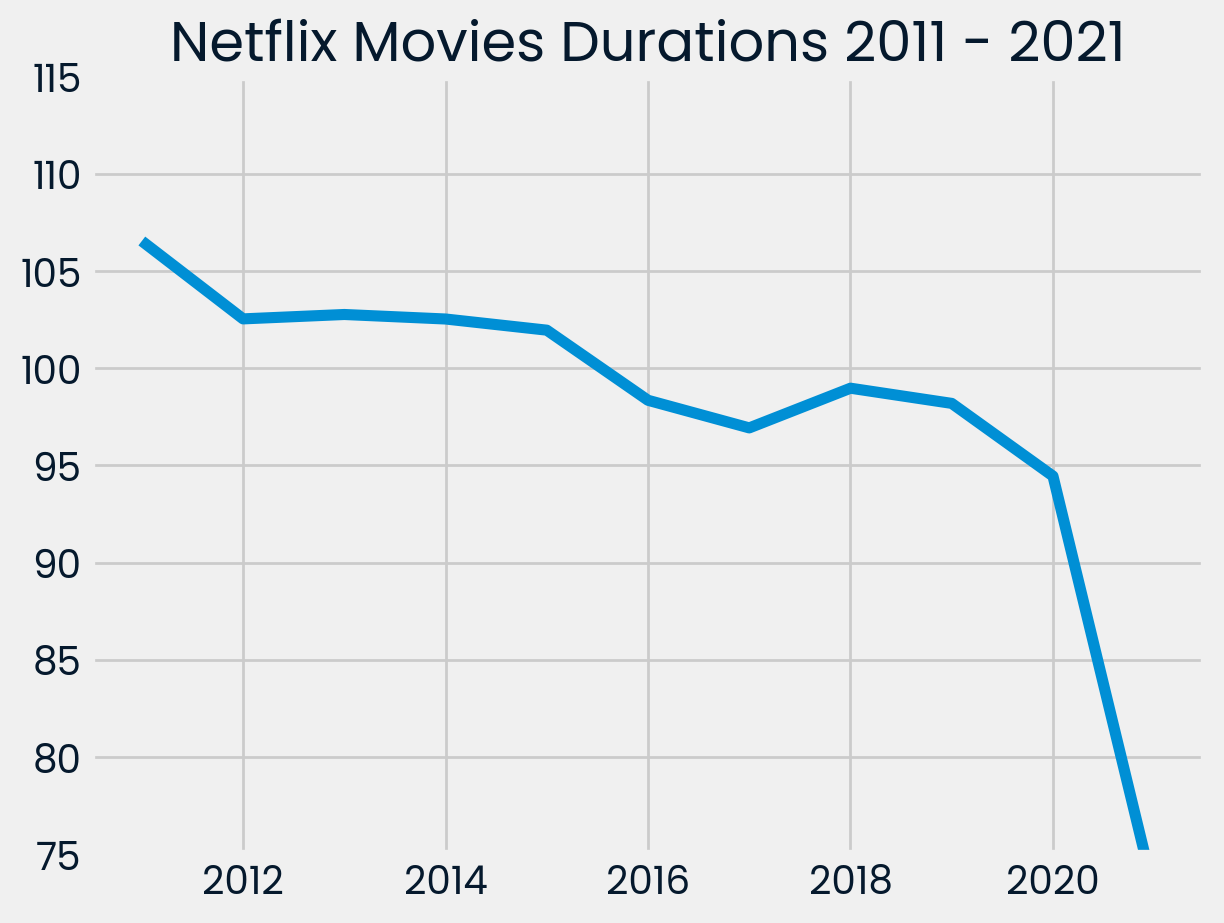

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(netflix_year2['release_year'],netflix_year2['duration'])
plt.ylim(75,115)

# Create a title
plt.title("Netflix Movies Durations 2011 - 2021")

# Show the plot
plt.show()

In [89]:
netflix_df = netflix_df.sort_values('duration', ascending = False)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4262,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,253,A high school teacher volunteers to transform ...,Comedies
2811,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,237,Hoping to prevent their father from skipping t...,Comedies
3349,s5377,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,228,Returning home from war after being assumed de...,Classic Movies
2224,s3522,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"January 10, 2021",2001,224,"In 1890s India, an arrogant British commander ...",Dramas
2012,s3196,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008,214,"In 16th-century India, what begins as a strate...",Action
...,...,...,...,...,...,...,...,...,...,...,...
367,s528,Movie,ANIMA,Paul Thomas Anderson,Thom Yorke,United Kingdom,"June 27, 2019",2019,15,In a short musical film directed by Paul Thoma...,Dramas
751,s1129,Movie,Buddy Thunderstruck: The Maybe Pile,Harry Chaskin,"Brian Atkinson, Ted Raimi, Harry Chaskin, Debi...",United States,"July 14, 2017",2017,14,Champion truck-racing dog Buddy and his best f...,Uncategorized
4802,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,"August 10, 2018",2018,12,Born without legs and stuck in foster care for...,Documentaries
961,s1505,Movie,Cosmos Laundromat: First Cycle,Mathieu Auvray,"Pierre Bokma, Reinout Scholten van Aschat",Netherlands,"June 4, 2019",2015,12,"Despondent on a desolate island, a suicidal sh...",Dramas


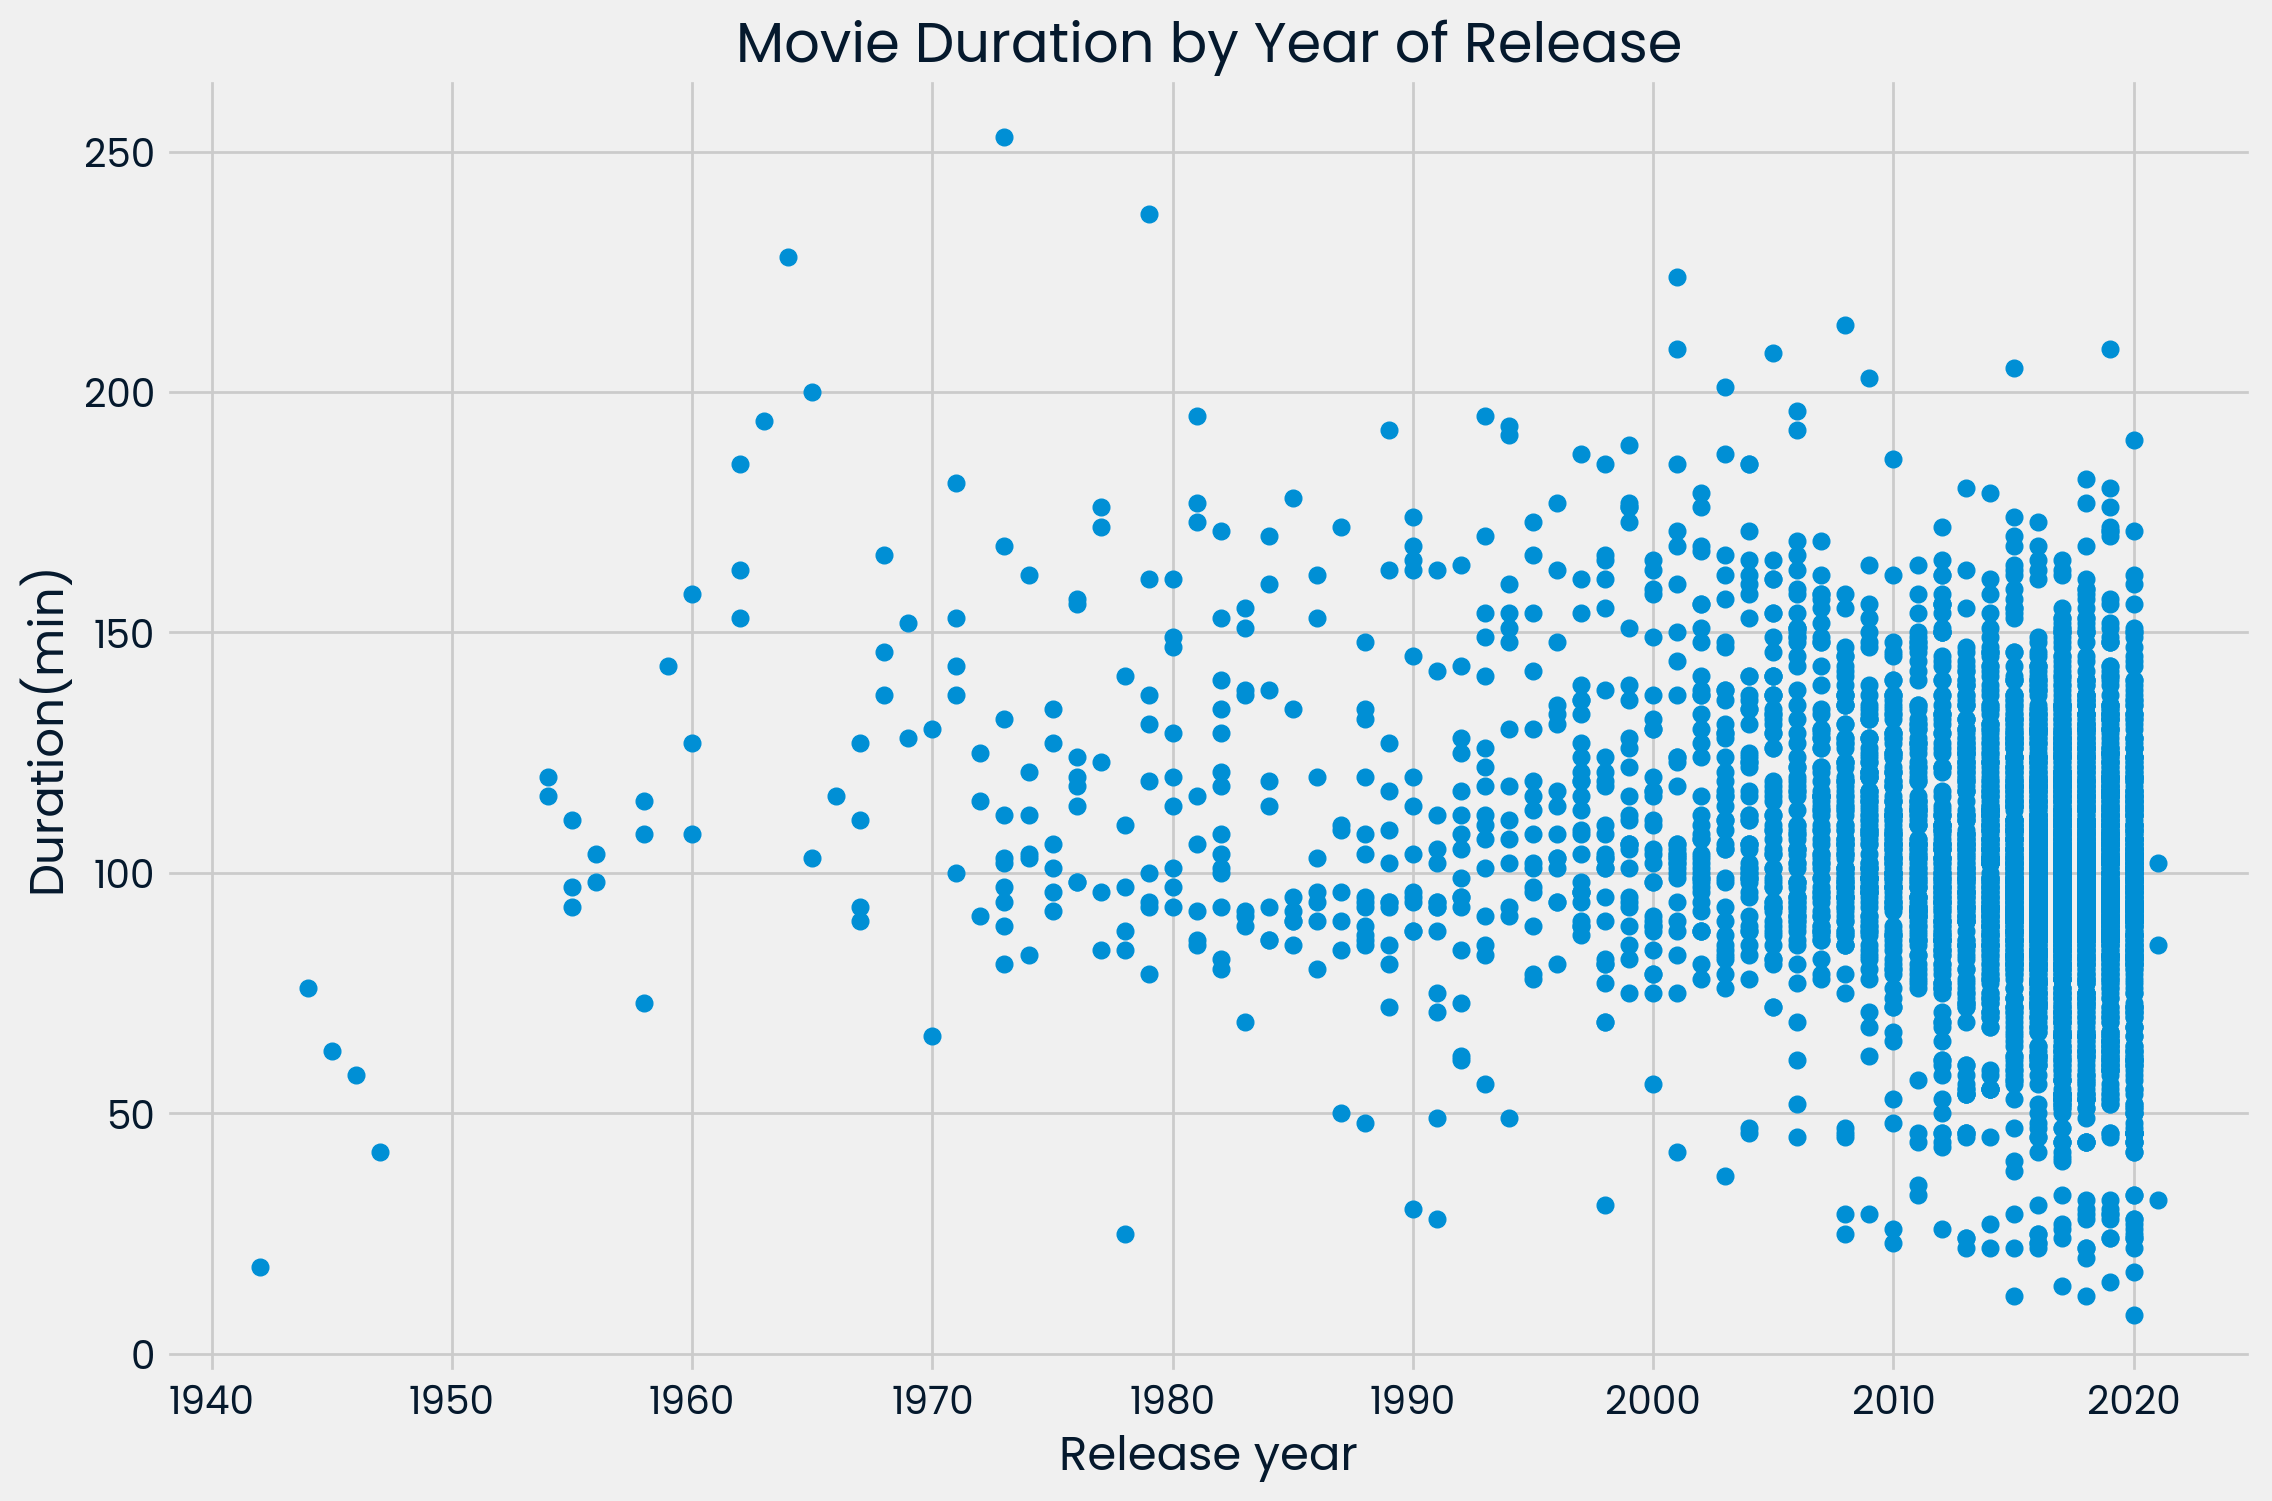

In [90]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])

# Create a title
plt.title('Movie Duration by Year of Release')
plt.xlabel("Release year")
plt.ylabel("Duration(min)")

# Show the plot
plt.show()

In [91]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'] < 60 ]

# Print the first 20 rows of short_movies
short_movies[0:20]

,title,country,genre,release_year,duration
114,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
123,A Family Reunion Christmas,United States,Uncategorized,2019,29
129,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
130,A Grand Night In: The Story of Aardman,United Kingdom,Documentaries,2015,59
153,A Russell Peters Christmas,Canada,Stand-Up,2011,44
164,A StoryBots Christmas,United States,Children,2017,26
173,A Very Murray Christmas,United States,Comedies,2015,57
204,Abominable Christmas,United States,Children,2012,44
210,Across Grace Alley,United States,Dramas,2013,24
219,Adam Devine: Best Time of Our Lives,United States,Stand-Up,2019,59


In [92]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_col_subset.iterrows():
    if row['genre'] == "Children":
        colors.append("red")
    elif row['genre'] == "Documentaries":
        colors.append("blue")
    elif row['genre'] == "Stand-Up":
        colors.append("green")
    elif row['genre'] == "Uncategorized":
        colors.append("yellow")
    else:
        colors.append("black")

# Inspect the first 10 values in your list      
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

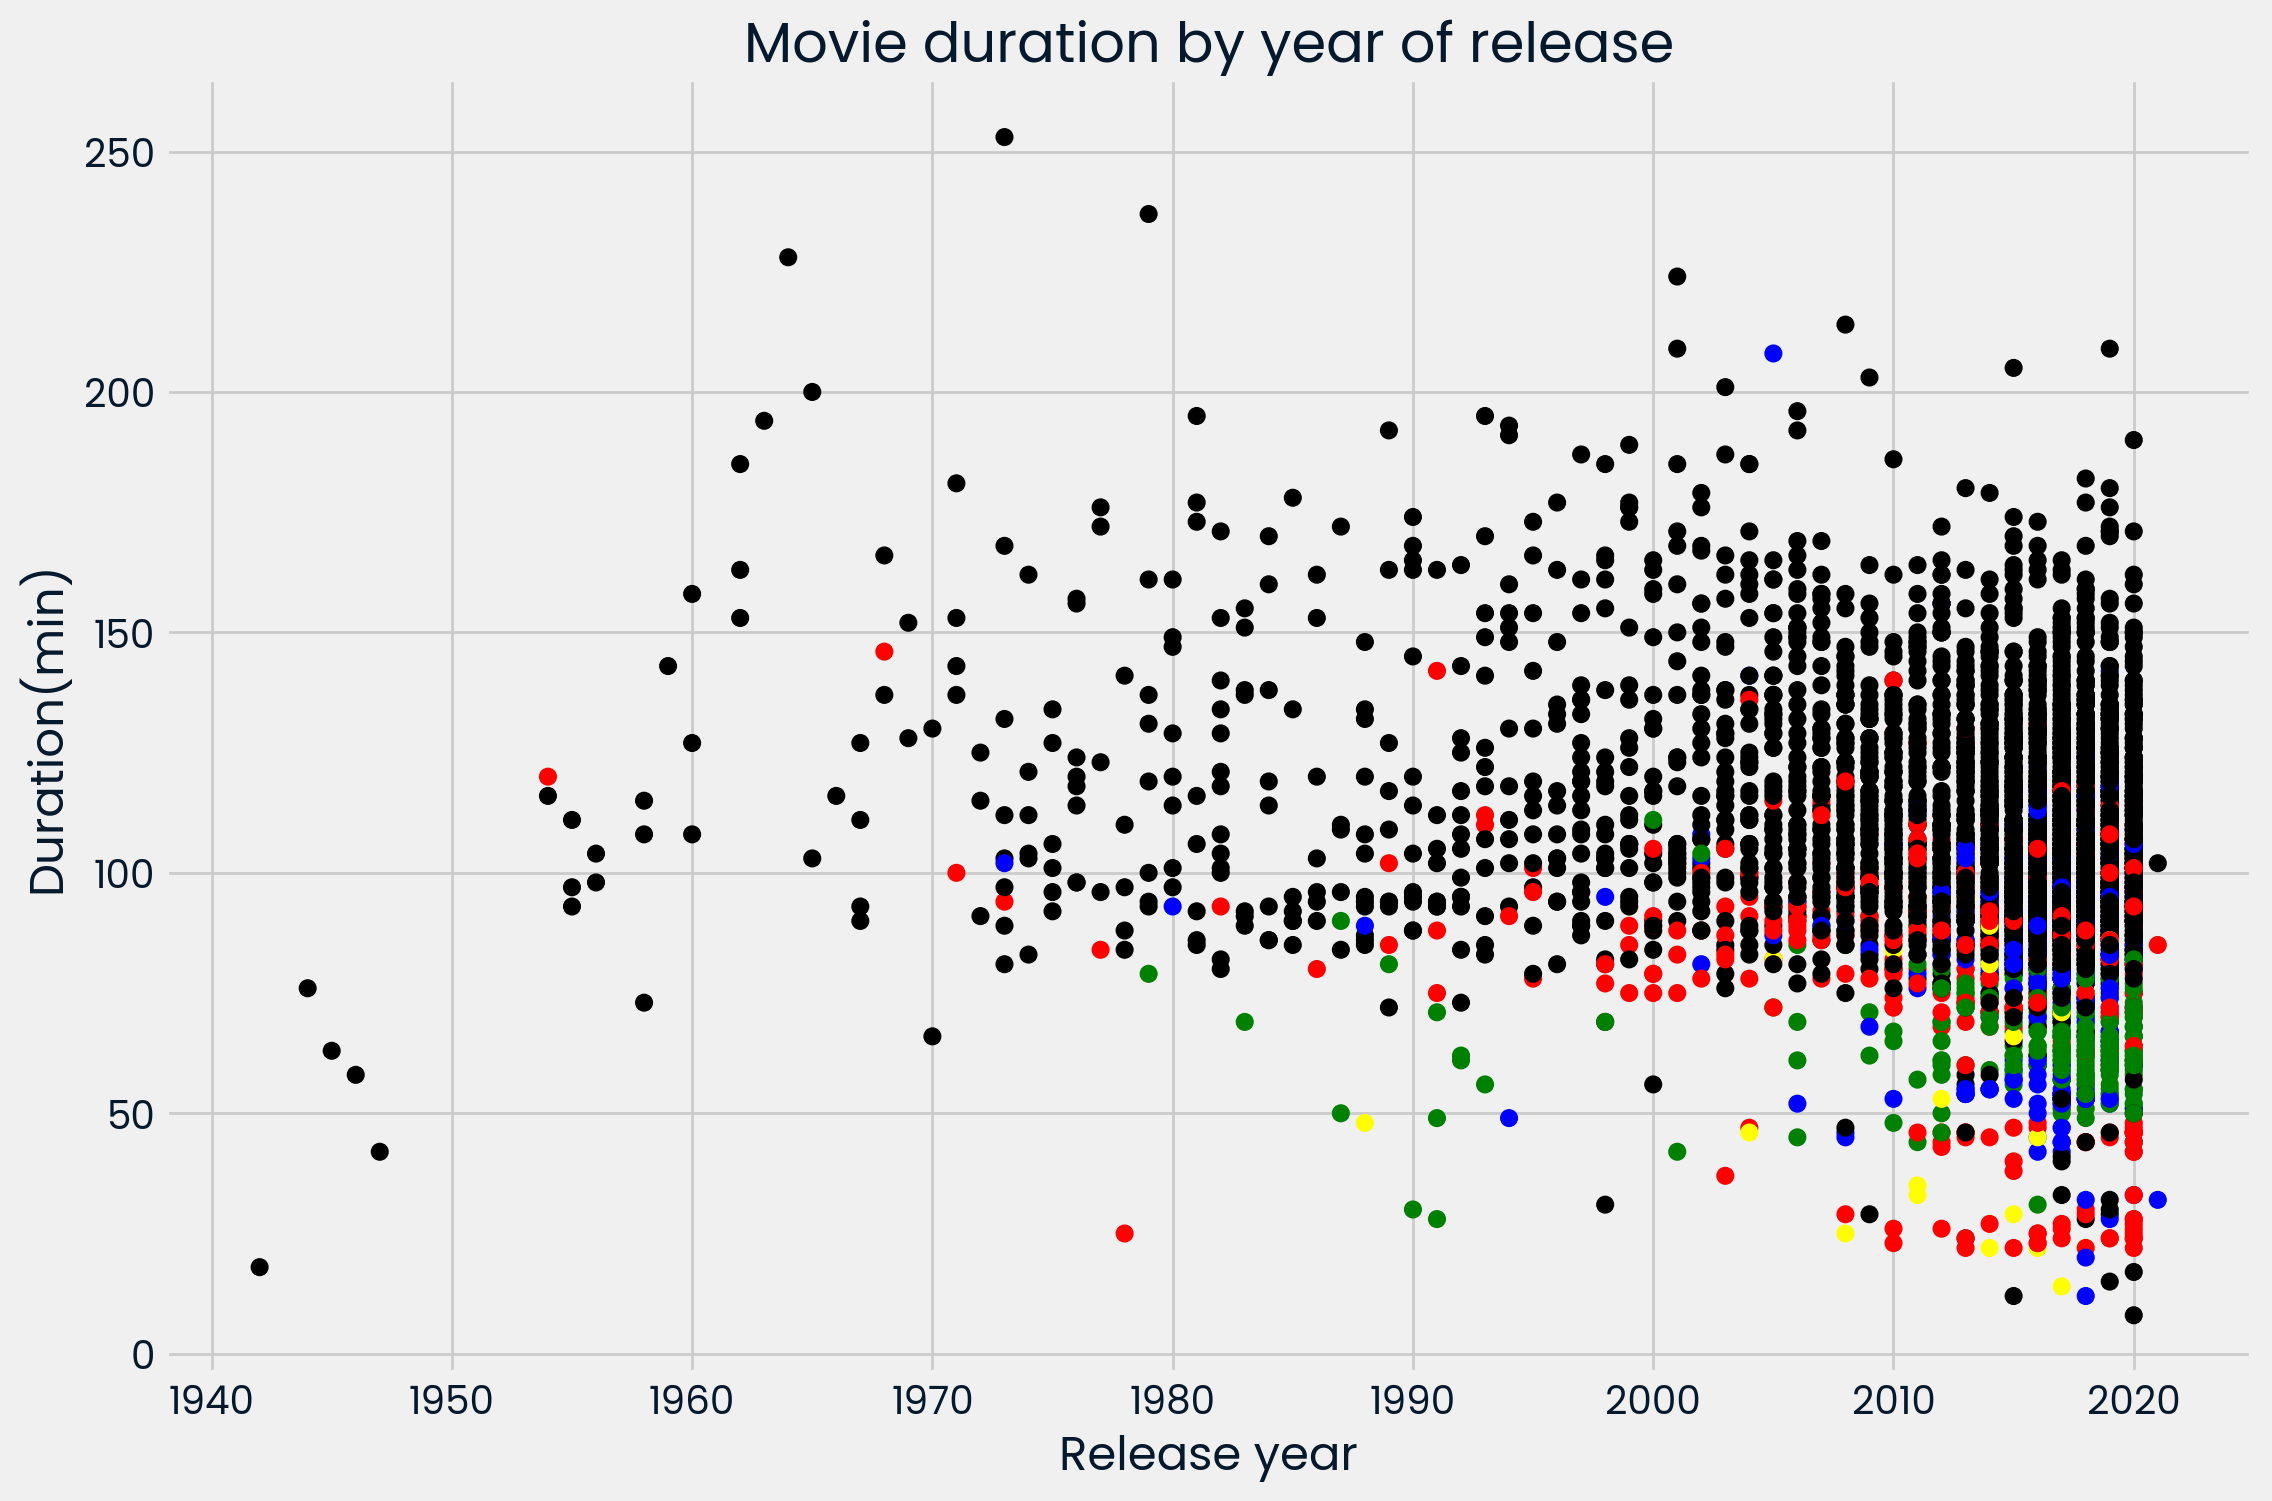

In [93]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'],c=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration(min)")
...

# Show the plot
plt.show()

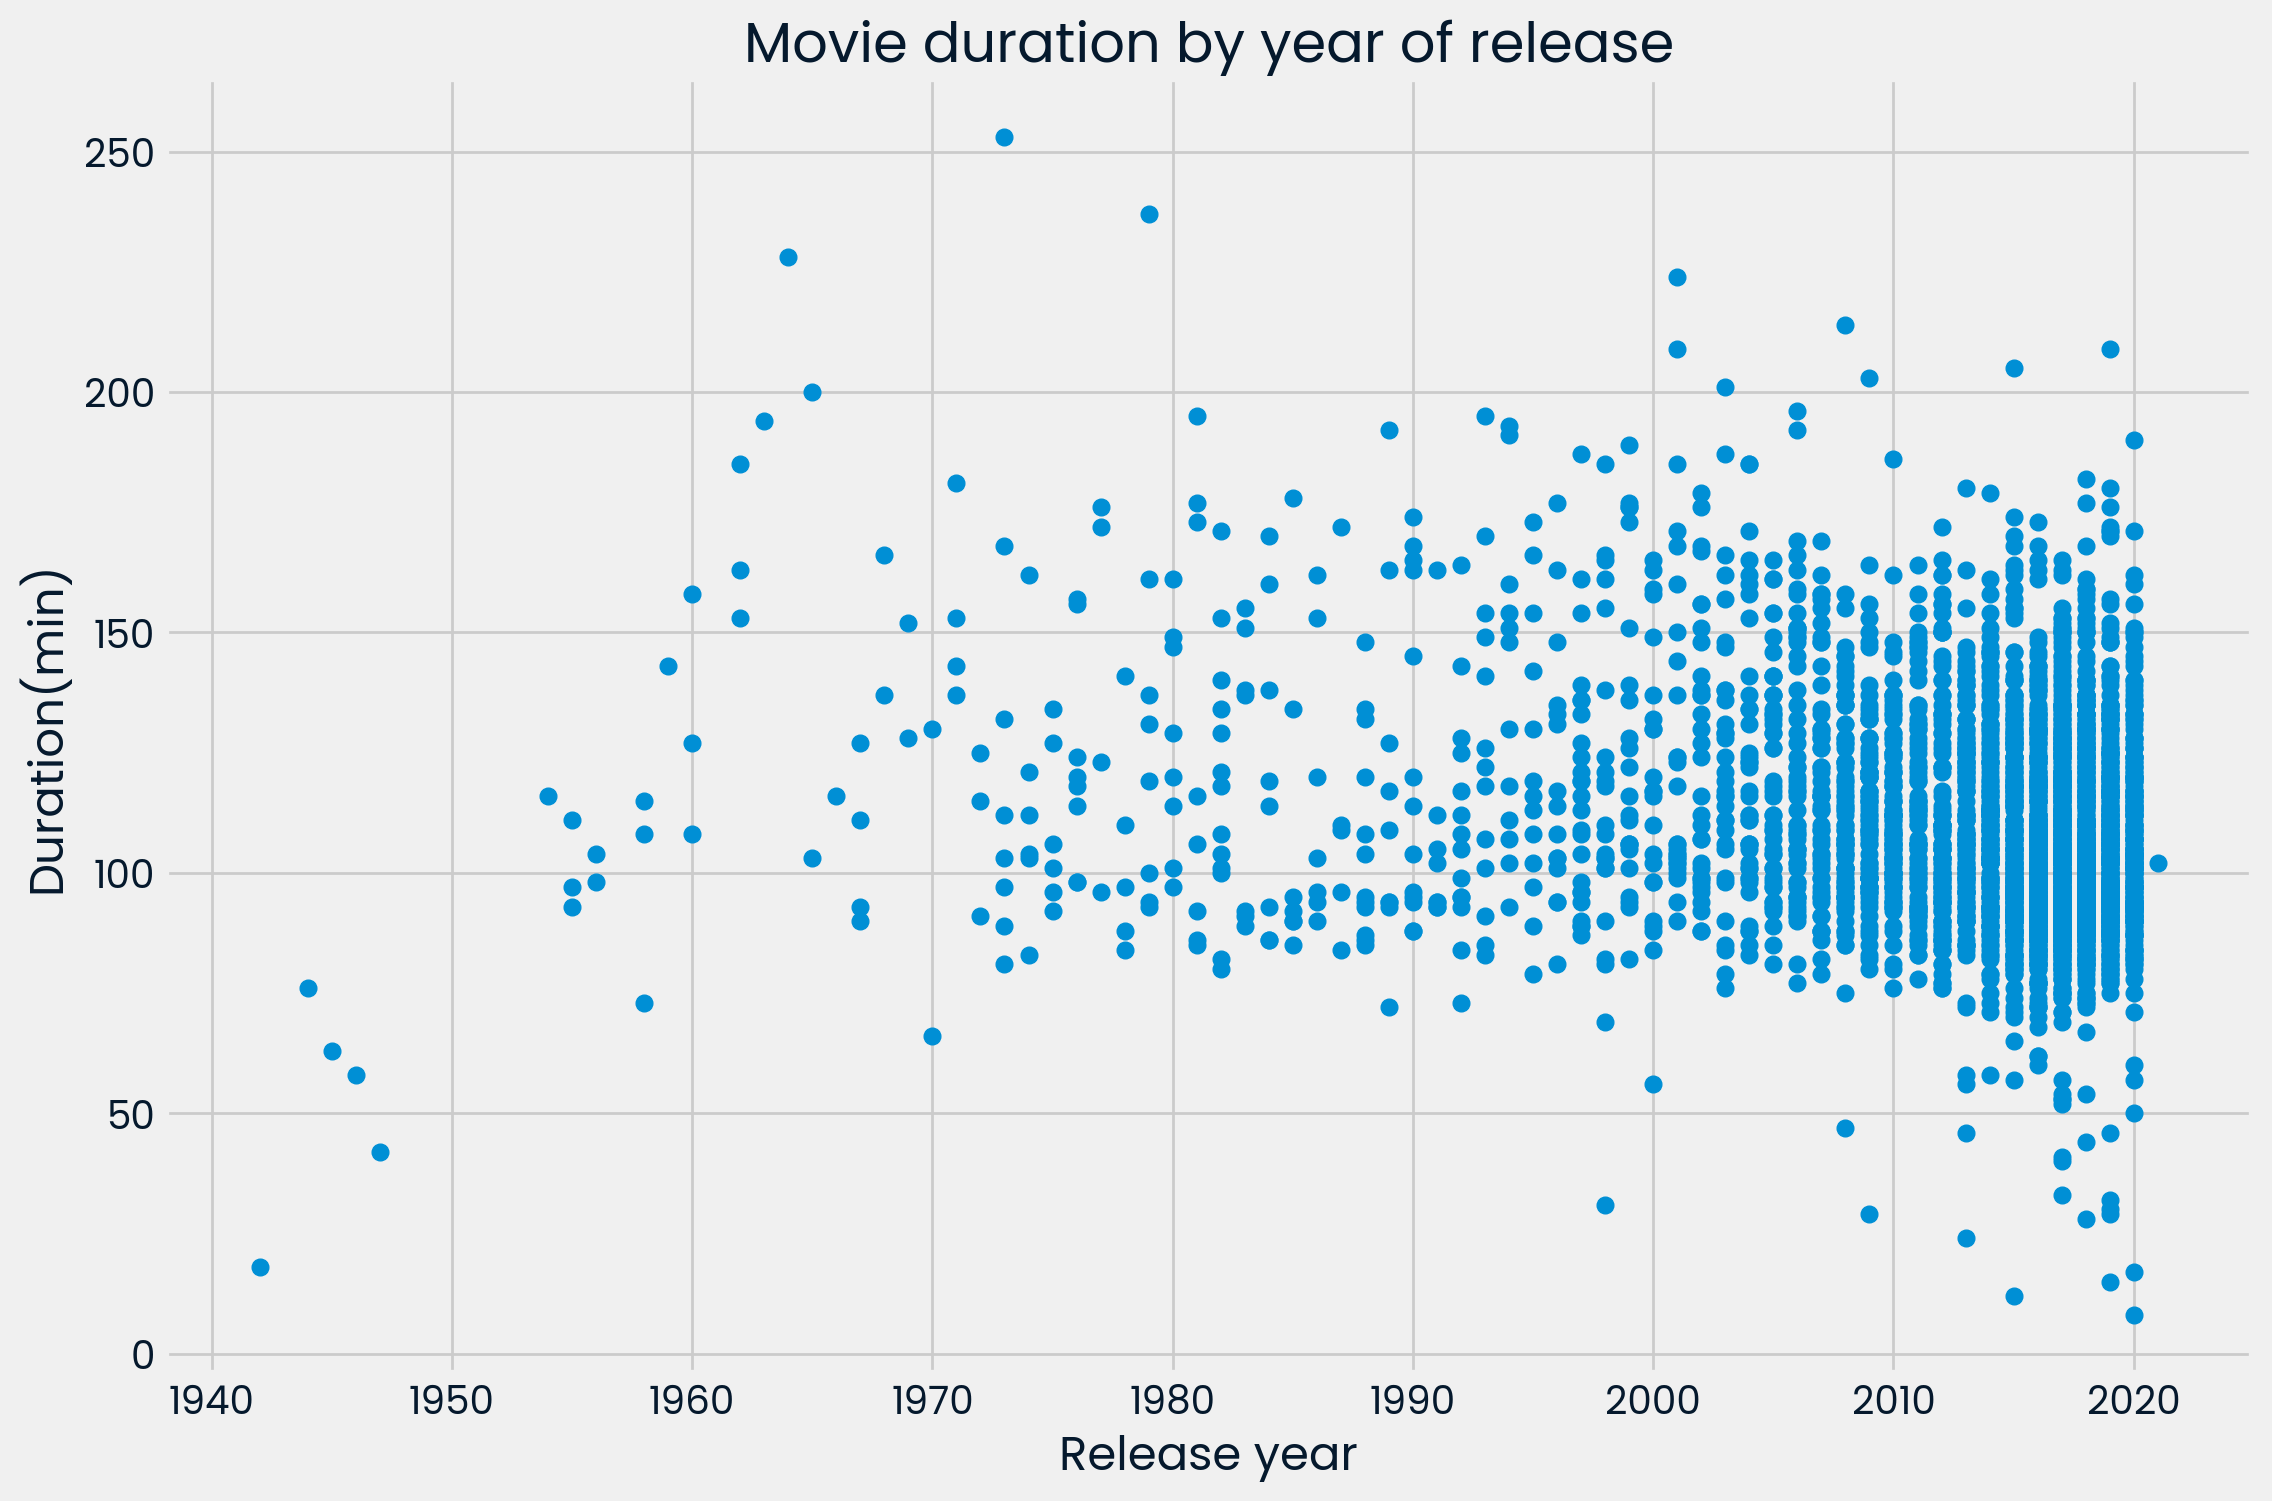

In [94]:
omitcats = ['Children','Documentaries','Stand-Up','Uncategorized']



netflix_movies_filter = netflix_movies_col_subset[~netflix_movies_col_subset['genre'].isin(omitcats)]


# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_filter['release_year'],netflix_movies_filter['duration'])

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration(min)")
...

# Show the plot
plt.show()

In [95]:
netflix_movies_filter.sort_values('release_year',ascending=False)

,title,country,genre,release_year,duration
4681,What Happened to Mr. Cha?,South Korea,Comedies,2021,102
2018,John Henry,United States,Dramas,2020,92
1160,Don’t Listen,Spain,Horror Movies,2020,98
3814,The Binding,Italy,Horror Movies,2020,93
3811,The Beast,Italy,Action,2020,100
...,...,...,...,...,...
4401,Thunderbolt,United States,Classic Movies,1947,42
2269,Let There Be Light,United States,Classic Movies,1946,58
2172,Know Your Enemy - Japan,United States,Classic Movies,1945,63
4513,Tunisian Victory,United States,Classic Movies,1944,76


In [96]:
#Group by year, but agg function prom and value_count
new_netflix_df = netflix_movies_filter.groupby('release_year').agg({'duration': 'mean', 'title': 'count'}).reset_index()
new_netflix_df

,release_year,duration,title
0,1942,18.000000,1
1,1944,76.000000,1
2,1945,63.000000,1
3,1946,58.000000,1
4,1947,42.000000,1
...,...,...,...
66,2017,104.176856,458
67,2018,105.633621,464
68,2019,105.782991,341
69,2020,106.389381,226


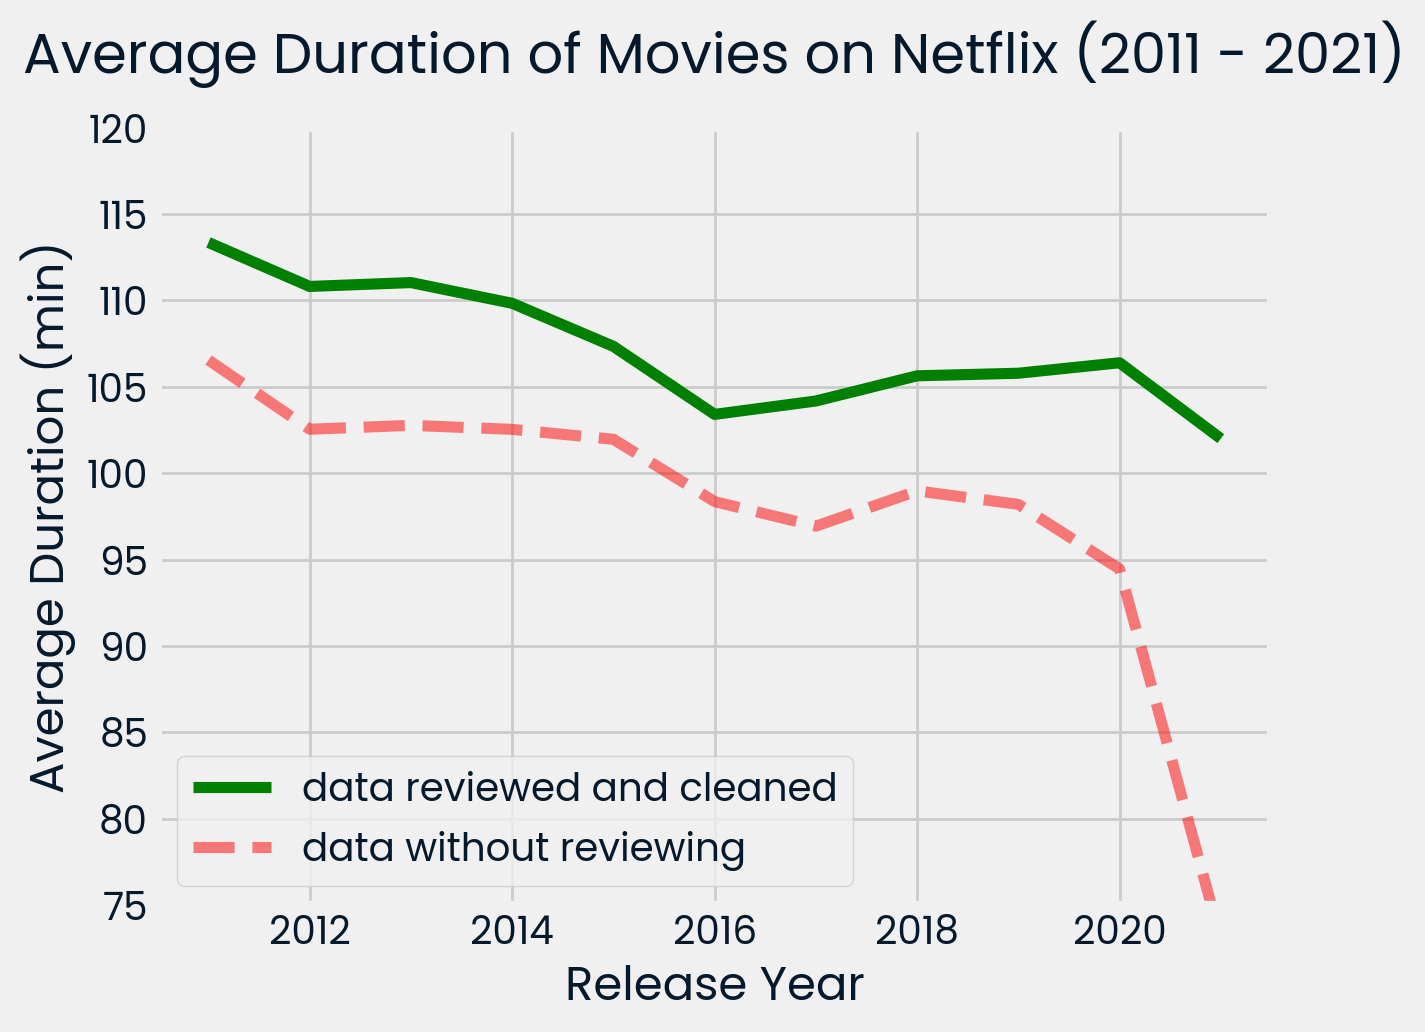

In [97]:
fig = plt.figure()

# Draw a line plot of release_years and durations

netflix_year[netflix_year['release_year']>= 2011]
plt.plot(new_netflix_df[new_netflix_df['release_year']>=2011]['release_year'],
         new_netflix_df[new_netflix_df['release_year']>=2011]['duration'],
         label='data reviewed and cleaned',
         color= 'green')
plt.plot(netflix_year2['release_year'],netflix_year2['duration'],
         alpha=0.5,label='data without reviewing',
         color='red',linestyle='dashed')
plt.ylim(75,120)
plt.legend(loc='lower left')

# Create a title
plt.title("Average Duration of Movies on Netflix (2011 - 2021)",pad=20)

# Create axis labels
plt.xlabel("Release Year")
plt.ylabel("Average Duration (min)")

# Show the plot
plt.show()